# Projet numérique maths-info

## Fonctions préliminaires


### Fonctions

In [1]:
# Python Standard Library
# -----------------------
pass

In [2]:
# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

In [3]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [4]:
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

### Exemples d'usage

In [5]:
def f(x, y):
    return np.sin(x) + 2.0 * np.sin(y)

grad_f = grad(f)

grad_f(0.0, 0.0) # array([1., 2.])

array([1., 2.])

In [6]:
def f(x, y):
    return np.array([x + 2 * y, 3 * x + 4 * y])

J_f = J(f)

J_f(0.0, 0.0) # array([[1., 2.], [3., 4.]])

array([[1., 2.],
       [3., 4.]])

## Courbes de Niveau

### Fonction

In [7]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

### Exemples

In [8]:
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

f1(0.8,0.8)

2.5600000000000005

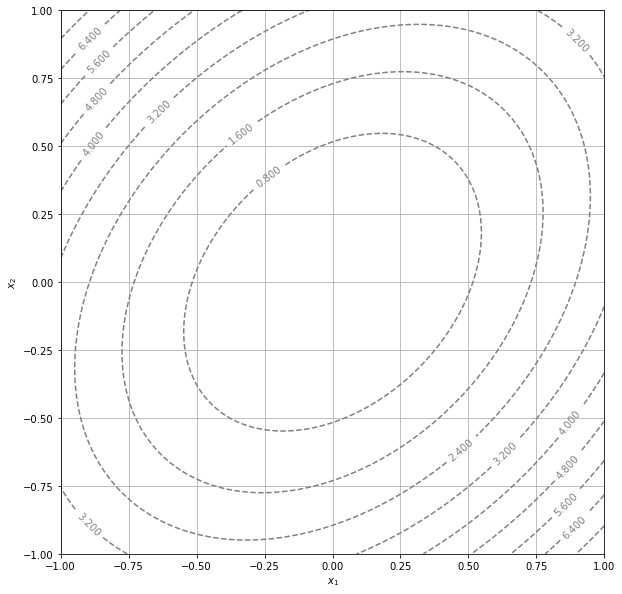

In [9]:
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

In [10]:
def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

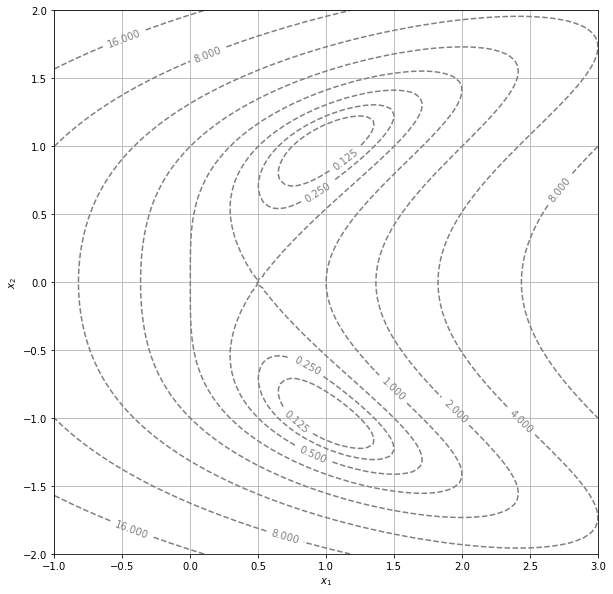

In [11]:
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

In [12]:
def f3(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) 

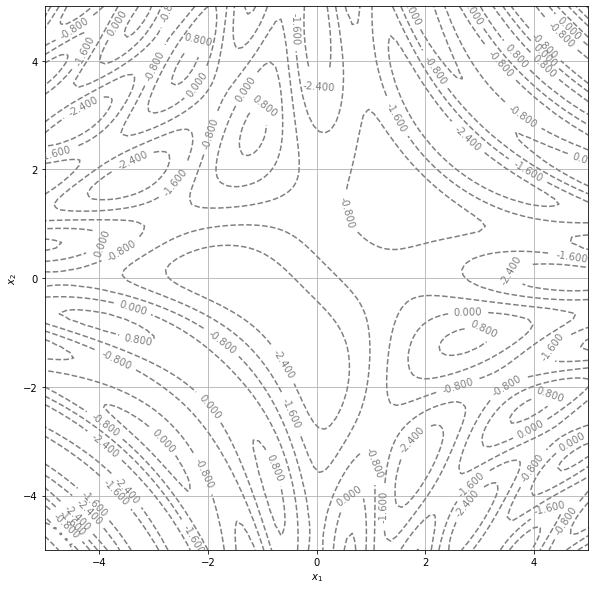

In [13]:
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

### Réponses aux questions

#### Question 1

On note $E$={$(x_1,x_2) \in \mathbb {R}^2 , f(x_1,x_2)=c$} 

$f$ est continue donc $E$ est fermé comme image réciproque du singleton {$c$} par une fonction continue.

De plus, $f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$ donc $\forall A \in \mathbb{R}$, $\exists y \in \mathbb{R}$ tel que si $\|(x_1,x_2)\| \ge y$, alors $f(x_1,x_2) \gt A$

En particulier, en prenant $ A \gt c$, on a $f(x_1,x_2) \gt c$. On en déduit que $E$ est borné, donc que $E$ est un compact. $E$ étant l'ensemble de niveau $c$ de $f$, cet ensemble est un compact.

En particulier, $E$ peut être l'ensemble vide si jamais la valeur $c$ n'est jamais atteinte par $f$ ; $E$ peut également être un singleton si $c$ est le minimum global de la fonction $f$ sur $\mathbb {R}^2$ (ou un ensemble de singletons si ce minimum est atteint pour différents couples de $\mathbb {R}^2$) ; sinon, $E$ est un ensemble de lignes qui se referment sur elles-mêmes en réunion éventuelle avec des singletons.


![courbe de niveau](courbeniv.png)


#### Question 2 

On note $\vec u$ le vecteur directeur du gradient de $f$ en $x_0$, dont les coordonnées sont $(\partial_1 f(x_0) , \partial_2 f(x_0))$  et $\vec x$ le vecteur position dont les coordonnées sont $(x_1-x_{10} , x_2-x_{20})$.

On remarque alors que $p(x_1,x_2) = det (\vec x , \vec u)$, donc que la norme de $p$ représente l'aire du parallélogramme formé par le vecteur position et le vecteur directeur du gradient.

Ainsi, plus $p$ augmente en valeur absolue, plus $\vec x$ est orthogonal à $\vec u$, donc plus on se déplace le long d'une ligne de niveau, orthogonalement au gradient. $p$ permet donc de savoir si on se déplace ou non dans le sens de plus forte pente.


#### Question 3

On note $W$ le voisinage ouvert de $x_0$ tel que $\nabla f(x)$ ne s'annule pas.

On définit alors $g : W \times \mathbb{R}  \longrightarrow \mathbb{R}^2$ tel que $g(x,t) = (f(x)-c , p(x)-t)$. $f$ et $p$ étant continûment différentiables, on a d'après le théorème d'assemblage que $g$ est continûment différentiable. De plus, $\partial_x g(x,t) = (df(x) , dp(x))$. $p$ étant linéaire, $dp(x) = p$, donc $\partial_x g(x,t) = (df(x) , p)$.

On a alors $J_{\partial_x g} = \begin{pmatrix}\partial_1 f(x) & \partial_2 f(x) \\ \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} & -\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} \end{pmatrix}$

On en déduit après calculs que $det (J_{\partial_x g})$ = -$\frac {(\nabla f(x) , \nabla f(x_0))}{\|\nabla f(x_0)\|^2}$. Dans le voisinage $W$, on sait que $\nabla f(x) \ne 0$, et le déterminant et le produit scalaire étant continus en tant que fonctions multilinéaire (pour le déterminant) et bilinéaire (pour le produit scalaire), on en déduit qu'il existe un voisinage (que l'on note également $W$), qui vérifie $det (J_{\partial_x g}) \ne 0$, donc que $J_{\partial_x g}$ est inversible. $\partial_x g$ est donc inversible en tout point de $W$.

Enfin, $g(x_0,0) = 0$.

On peut donc appliquer le théorème des fonctions implicites puisque la fonction $g$ respecte toutes ses hypothèses : il existe un voisinage ouvert $U$ de $x_0$, un voisinage ouvert $V$ de 0, tels que $U$ $\times$ $V$ C $W$, et une fonction $\alpha : V \longrightarrow \mathbb{R}^2$ telle que $\forall x \in U, \forall t \in V, g(x , t) = 0 \Leftrightarrow x = \alpha (t)$

Comme $V$ est un voisinage de 0 dans $\mathbb{R}$, $\exists \epsilon \in \mathbb{R}_{+*}$, $\left]-\varepsilon,\varepsilon \right[$ C $V$. On définit alors $\gamma : \left]-\varepsilon,\varepsilon \right[ \longrightarrow \mathbb{R}^2$ telle que $\gamma(t) = \alpha(t)$, ce qui nous permet de conclure.


#### Question 4

On utilise la formule de la différentielle donnée par le théorème des fonctions implicites : $d \gamma (t) = - (\partial_x g(x,t))^{-1}.\partial_t g(x,t)$.

Il faut inverser $\partial_x g(x,t)$ : pour cela, on utilise l'expression du déterminant calculée à la question précédente : $det (J_{\partial_x g})$ = -$\frac {(\nabla f(x) , \nabla f(x_0))}{\|\nabla f(x_0)\|^2}$. On sait que ce déterminant est non nul (on l'a démontré à la question précédente), et on a après calculs que $J_{\partial_x g}^{-1}$ = - $\frac {\|\nabla f(x_0)\|^2}{(\nabla f(x) , \nabla f(x_0))} \begin{pmatrix} -\partial_1 f(x_0) & -\partial_2 f(x) \\ -\partial_2 f(x_0) & \partial_1 f(x) \end{pmatrix}$

On a aussi $\partial_t g(x,t) = \begin{pmatrix} 0 \\ -1 \end{pmatrix}$ et donc en évaluant en 1 pour avoir $\gamma '$, on obtient finalement $\gamma '(t) = -\frac {\|\nabla f(x_0)\|^2}{(\nabla f(x) , \nabla f(x_0))} \begin{pmatrix} \partial_2 f(x) \\ -\partial_1 f(x) \end{pmatrix}$

Comme $\nabla f(x) \ne 0$ dans le voisinage considéré, on a $\begin{pmatrix} \partial_2 f(x) \\ -\partial_1 f(x) \end{pmatrix} \ne \begin{pmatrix} 0 \\ 0 \end{pmatrix}$ dont $\gamma '(t) \ne 0$ $\forall t \in \left]-\varepsilon, \varepsilon \right[$


Enfin, pour montrer l'orthogonalité avec $\nabla f(\gamma (t))$, on calcule : 

$(\gamma '(t) , \nabla f(\gamma (t)))$ = $-\frac {\|\nabla f(x_0)\|^2}{(\nabla f(x) , \nabla f(x_0))}$  ($\begin{pmatrix} \partial_2 f(x) \\ -\partial_1 f(x) \end{pmatrix}$ . $\begin{pmatrix} \partial_1 f(x) \\ \partial_2 f(x) \end{pmatrix}) = 0$.

Les deux résultats demandés sont donc bien vérifiés.


## Construction des courbes de niveau

### Méthode de Newton

#### Question 5

L'application à laquelle nous destinons la fonction Newton demande une assez bonne précision (il faut arriver à un résultat représentatif du couple annulateur cherché), cependant on ne va pas lui demander d'être trop précise pour ne pas avoir un message d'erreur dû à un dépassement systématique de la valeur de N. On prendra donc $\epsilon = 10^{-3}$

In [14]:
N=500
eps=10**(-3)

#### Tâche 1


In [15]:
# On a, d'après la méthode de Newton :
# x_k+1 = x_k - Jf(x_k)^-1 * f(x_k)
# Ce qui donne :
# f(x_k) = Jf(x_k)(x_k - x_k+1)
# On reconnaît un système linéaire

def Newton(F, x0, y0, eps=eps, N=N): 
    for i in range(N):
        # on veut résoudre un système de la forme AX=B
        A = J(F)(x0, y0)
        B = F(x0, y0)
        X = np.linalg.solve(A, B)
        x, y = x0 - X[0], y0 - X[1]
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return x, y
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")
        

#### Tâche 2

In [16]:
def g1(x1, x2):
    return np.array([f1(x1, x2) - 0.8 , x1 - x2])

x1, x2 = Newton(g1, 0.8, 0.8)
print(x1, x2)

0.4472135970019964 0.4472135970019964


### Génération des points

#### Question 6

Pour générer le point suivant, respectant les critères donnés, à partir d'un point de référence $(x_i,y_i)$, on génère le gradient en ce point à l'aide d'une des fonctions données en introduction, et on le multiplie par la matrice de rotation $R = \begin{pmatrix}\cos(\theta) & -\sin (\theta) \\ \sin(\theta) & \cos(\theta)\end{pmatrix}$ avec $\theta = -\frac{\pi}{2}$ (pour aller vers la droite, donc tourner de $\frac{\pi}{2}$ dans le sens anti-trigonométrique). On note $\vec u$ ce vecteur. En prenant le point $(x_i,y_i) + \delta \frac {\vec u}{||\vec u||}$ (afin de simplifier l'appel de la fonction Newton, on place ce point à une distance $\delta$ du point précédent) et en lui appliquant la méthode de Newton précédente avec comme deuxième condition $\sqrt {(x_{i+1}-x_i)^2 + (y_{i+1}-y_i)^2} - \delta = 0$, on crée itérativement les points voulus, donc la ligne de niveau voulue.

In [17]:
def fonction_level_curve(f, x0, y0, c, delta):
    def g_f(x, y):
        return(np.array([f(x, y) - c, (x - x0)**2 + (y - y0)**2 - delta**2]))
    return (g_f)

# on définit la matrice de rotation
mat_rot = np.array(( (0, 1),
                   (-1, 0) )) # matrice de rotation de -pi/2

def level_curve(f, x0, y0, delta=0.1, N=N, eps=eps):
    res = np.empty((2, N), dtype=float)
    c = f(x0, y0)
    res[:,0] = np.array([x0, y0])
    # création du premier point
    for i in range(1, N) :
        gradient = grad(f)(x0, y0)
        # on se place à un nouveau point
        u = mat_rot.dot(gradient)
        norme_u = np.linalg.norm(u)
        nouveau_point = np.array([x0, y0]) + (delta/norme_u) * u
        # on trouve les nouvelles coordonnées, sur le cercle de centre (x0, y0) et de rayon delta
        x , y = Newton(fonction_level_curve(f, x0, y0, c, delta), nouveau_point[0], nouveau_point[1])
        res[:,i] = np.array([x, y])
        x0, y0 = x, y
    return res

#### Tâche 3

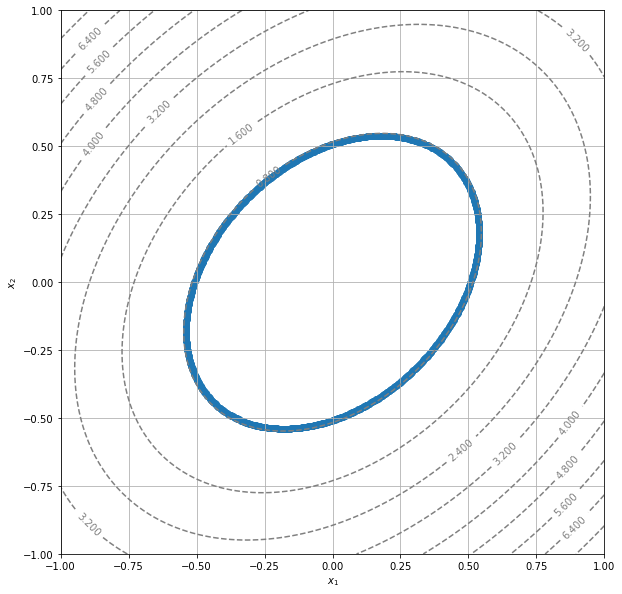

In [18]:
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)


tableau = level_curve(f1, 0.44, 0.44)

plt.scatter(tableau[0], tableau[1])
plt.show()

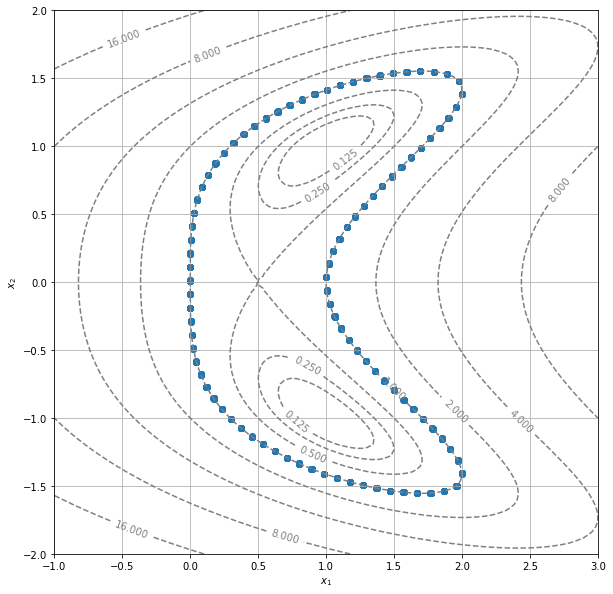

In [19]:
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

tableau = level_curve(f2, 0.0, 0.01)

plt.scatter(tableau[0], tableau[1])
plt.show()

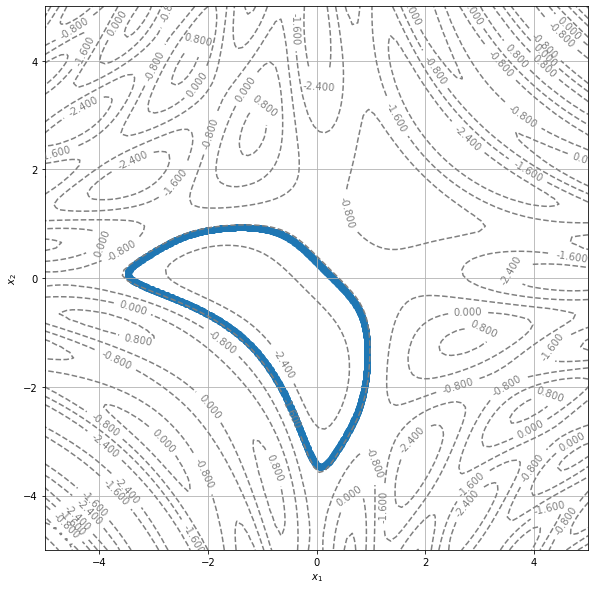

In [20]:
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

tableau = level_curve(f3, 0.0, 0.3)

plt.scatter(tableau[0], tableau[1])
plt.show()

### Bouclage et auto-intersection

#### Question 7

En reprenant le raisonnement annexe en fin de question 1, on observe géométriquement que les lignes de niveau se referment sur elles-mêmes sans s'intersecter (ou sont des simples points) partout sauf au niveau des maxima locaux de la fonction (voir schémas), ou deux lignes qui se referment sur elles-mêmes partagent un point commun (qui est le maximum global), donc sont auto-intersectantes. Pour la plupart des fonctions que nous étudions et qui repectent le critère de la question 1 ($f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$), les maxima locaux sont en nombre fini donc les lignes de niveau ne s'intersectent pas presque partout. 

Par conséquent, il suffit, en étant raisonnablement optimiste, de tester l'intersection du dernier segment avec le premier, car la plupart du temps, on sera sur une ligne de niveau qui n'est pas auto-intersectante (la probabilité de tomber sur une ligne auto-intersectante est nulle), donc qui se referme simplement sur elle-même. On attend juste d'atteindre le moment ou la ligne se referme sur elle-même avant de mettre fin au programme, pour ne pas recommencer un tour et gâcher de la mémoire et du temps.

![courbe de niveau auto-intersectante](courbeniiv.png)

#### Tâche 4

In [21]:
'''
On élabore dans un premier temps un programme qui détecte si deux segments s'intersectent
'''


# renvoie la position du point c par rapport à la droite AB
# 1 <=> c est "au-dessus" de la droite 
# -1 <=> c est "en-dessous"
# 0 <=> a,b et c sont colinéaires
# a,b et c sont supposés différents
def side(a,b,c):
    d = (c[1]-a[1])*(b[0]-a[0]) - (b[1]-a[1])*(c[0]-a[0])
    return 1 if d > 0 else (-1 if d < 0 else 0)

# renvoie True si c est à l'intérieur du segment [a, b], False sinon
# les points a, b et c sont supposés colinéaires
def is_point_in_closed_segment(a, b, c):
    if a[0] < b[0]:
        return a[0] <= c[0] and c[0] <= b[0]
    if b[0] < a[0]:
        return b[0] <= c[0] and c[0] <= a[0]

    if a[1] < b[1]:
        return a[1] <= c[1] and c[1] <= b[1]
    if b[1] < a[1]:
        return b[1] <= c[1] and c[1] <= a[1]

    return a[0] == c[0] and a[1] == c[1]

# Vérifie si les segments [a, b] et [c, d] s'intersectent
def closed_segment_intersect(a,b,c,d):
    if (a == b).all():
        return (a == c).all() or (a == d).all()
    if (c == d).all():
        return (c == a).all() or (c == b).all()

    s1 = side(a,b,c)
    s2 = side(a,b,d)

    # Tous les points sont colinéaires
    if s1 == 0 and s2 == 0:
        return \
            is_point_in_closed_segment(a, b, c) or is_point_in_closed_segment(a, b, d) or \
            is_point_in_closed_segment(c, d, a) or is_point_in_closed_segment(c, d, b)

    # Ils ne se touchent pas et c et d sont du même côté de la droite AB
    if s1 and s1 == s2:
        return False

    s1 = side(c,d,a)
    s2 = side(c,d,b)

    # idem
    if s1 and s1 == s2:
        return False

    # arrivé ici, les segments s'intersectent
    return True

'''
On peut désormais écrire le programme
'''

def level_curve_question_7(f, x0, y0, delta=0.1, N=N, eps=eps):
    res = np.empty((2, N), dtype=float)
    c = f(x0, y0)
    # on calcule les bornes du premier segment
    a = np.array([x0, y0])
    res[:,0] = a
    gradient = grad(f)(x0, y0)
    # On calcule le nouveau point
    u = mat_rot.dot(gradient)
    norme_u = np.linalg.norm(u)
    nouveau_point = np.array([x0, y0]) + (delta/norme_u) * u
    x , y = Newton(fonction_level_curve(f, x0, y0, c, delta), nouveau_point[0], nouveau_point[1])
    b = np.array([x, y])
    res[:,1] = b
    x0, y0 = x, y

    # on calcule un troisième point
    gradient = grad(f)(x0, y0)
    u = mat_rot.dot(gradient)
    norme_u = np.linalg.norm(u)
    nouveau_point = np.array([x0, y0]) + (delta/norme_u) * u
    x , y = Newton(fonction_level_curve(f, x0, y0, c, delta), nouveau_point[0], nouveau_point[1])
    res[:,2] = np.array([x, y])
    x0, y0 = x, y

    # puis on calcule les suivants
    for i in range(3, N) :
        gradient = grad(f)(x0, y0)
        # on se place à un nouveau point "dans le sens de grad(f)"
        u = mat_rot.dot(gradient)
        norme_u = np.linalg.norm(u)
        nouveau_point = np.array([x0, y0]) + (delta/norme_u) * u
        # on trouve les nouvelles coordonnées, sur le cercle de centre (x0, y0) et de rayon delta
        x , y = Newton(fonction_level_curve(f, x0, y0, c, delta), nouveau_point[0], nouveau_point[1])
        res[:,i] = np.array([x, y])
        # test d'auto-intersection
        if closed_segment_intersect(a, b, res[:,i-1], np.array([x, y])) :
            print(f"Auto-intersection après {i} points.")
            return res[:,:i]
        x0, y0 = x, y
    return res

#### Tâche 5

Auto-intersection après 34 points.


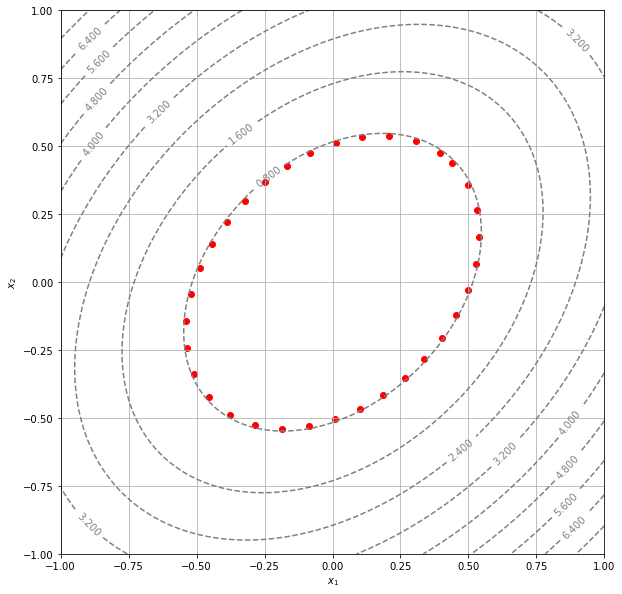

In [22]:
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)
#test sur la fonction f1

tableau = level_curve_question_7(f1, 0.44, 0.44)
#print(tableau)
plt.scatter(tableau[0], tableau[1], color='red')
plt.show()

Auto-intersection après 116 points.


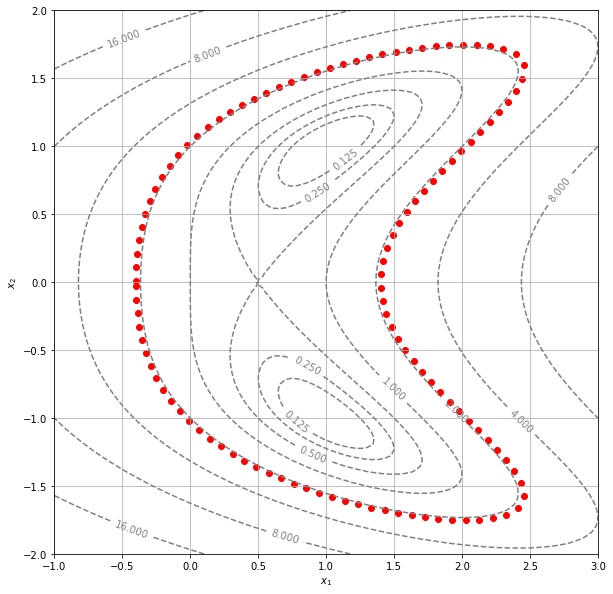

In [23]:
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

#test sur le fonction f2

tableau = level_curve_question_7(f2, -0.4, 0.01)
#print(tableau)
plt.scatter(tableau[0], tableau[1], color='red')
plt.show()

Auto-intersection après 136 points.


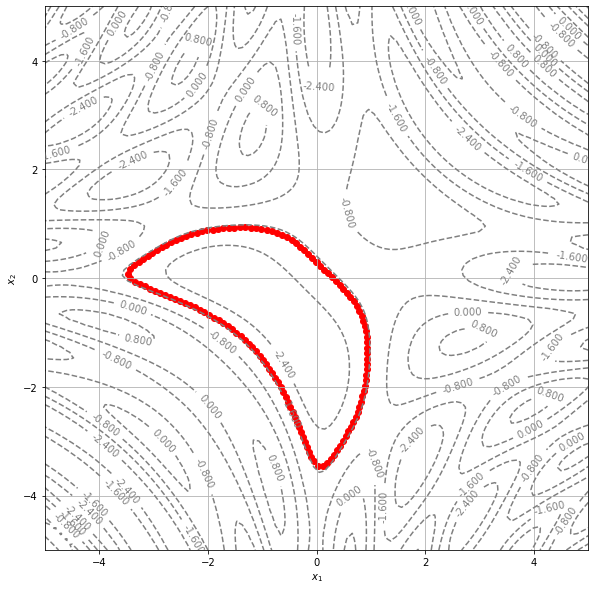

In [24]:
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

#test sur la fonction f3

tableau = level_curve_question_7(f3, 0.0, 0.3)
#print(tableau)
plt.scatter(tableau[0], tableau[1], color='red')
plt.show()

## Post-traitement

### Interpolation

#### Question 8

Traduisons les conditions sous la forme d'un système : 

on a $\gamma(0)=P_1$ et $\gamma(1)=P_2$

ainsi que $\gamma'(0)=a_1u_1$ et $\gamma'(1)=a_2u_2$

et on cherche $\gamma: [0,1] \to \mathbb{R}^2$ continûment différentiable de la forme $\gamma (t) = (x(t)=a+bt+ct^2,y(t) = d+et+ft^2)$. On vérifie aisément que $\gamma$ est continûment différentiable avec le théorème d'assemblage, car $x$ et $y$ sont des fonctions polynômiales.

On a donc $(a,d)=P_1,   (a+b+c, d+e+f)=P_2$ et    $(b,e)=a_1u_1,    (b+2c,e+2f)=a_2u_2$

On va donc résoudre ce système pour trouver $a, b, c, d, e,$ et $f$, puis $a_1$ et $a_2$ en notant $P_1=(x_1,y_1)$, $P_2=(x_2,y_2)$, $u_1=(u_{1x},u_{1y})$ et $u_2=(u_{2x},u_{2y})$

On trouve successivement 

$a=x_1$

$b=a_1u_{1x}$

$c=x_2-x_1-a_1u_{1x}=\frac {a_2u_{2x}-a_1u_{1x}}{2}$

$d=y_1$

$e=a_1u_{1y}$

$f=y_2-y_1-a_1u_{1y}=\frac {a_2u_{2y}-a_1u_{1y}}{2}$


On en déduit maintenant $a_1$ et $a_2$ pour chercher les conditions à vérifier pour qu'une telle solution existe:

après calculs, $a_1=\frac {2[u_{2y}(x_2-x_1)+u_{2x}(y_1-y_2)]}{u_{1x}u_{2y}-u_{2x}u_{1y}}$. La condition pour que $a_1$ soit bien défini est $u_{1x}u_{2y}-u_{2x}u_{1y} \ne 0$ soit $det \begin{pmatrix} u_{1x} &u_{2x} \\u_{1y} & u_{2y}\end{pmatrix} \ne 0$, et pour que $a_1$ soit non nul, $u_{2y}(x_2-x_1)-u_{2x}(y_2-y_1) \ne 0$, soit $det \begin{pmatrix} u_{2x} & x_2-x_1 \\u_{2y} & y_2-y_1\end{pmatrix} \ne 0$

Donc : 

$\vec u_1$ et $\vec u_2$ non colinéaires

$\vec u_2$ et $\vec x=\vec {P_1P_2}$ non colinéaires

On trouve les mêmes conditions pour $a_2$.

Et on a finalement $a_1 = \frac {2 det(u_2,x)}{det(u_1,u_2)}$

#### Tâche 6

In [25]:
def gamma(t,P1,P2,u1,u2):

    det1 = u1[0]*u2[1] - u2[0]*u1[1]
    det2 = u2[1]*(P2[0]-P1[0]) - u2[0]*(P2[1]-P1[1])
    alpha = (2*det2) / det1
    
    if det1 == 0 or det2 == 0:
        #on fait un chemin lineaire quand les conditions ne sont pas respectées
        xt = (P2[0] - P1[0])*t + P1[0]
        yt = (P2[1]-P1[1])*t + P1[1]
        return np.array([xt,yt]).reshape(2,len(t))
        
    else:
        #on implémente la fonction gamma si les conditions sont respectées
        # définir successivment les valeurs des coefficients est, certes peu élégant, mais permet de gagner en lisibilité
        a = P1[0]
        b = alpha * u1[0]
        c = P2[0] - P1[0] - alpha*u1[0]
        d = P1[1]
        e = alpha*u1[1]
        f = P2[1]-P1[1] - alpha*u1[1]
        
        return np.array((a + b*t + c*(t**2), d +e*t + f*(t**2))).reshape(2,len(t))

# cette fonction marche pour des valeurs vectorielles de t

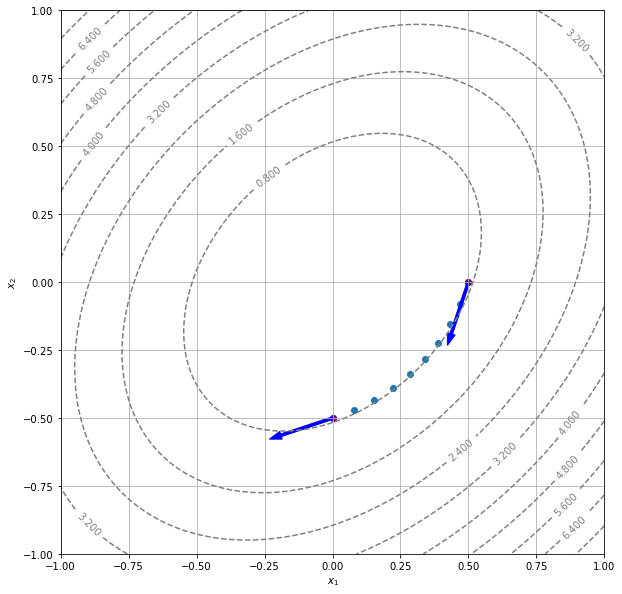

In [26]:
# on teste avec l'exemple de f1

display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

t = np.linspace(0, 1,10)
P1 = np.array([0.0,-0.5])
P2 = np.array([0.5, 0.0])
u1 = mat_rot.dot(grad(f1)(0.0,-0.5))
u2 = mat_rot.dot(grad(f1)(0.5,0.0))

# on trace gamma
points = gamma(t, P1, P2, u1, u2)
plt.scatter(points[0], points[1])
    
#on trace P1 et P2
plt.scatter(0.0,-0.5, color='purple')
plt.scatter(0.5,0.0, color='purple')

#on trace u1
delta = 0.2
norm_u1 = delta*(1/np.linalg.norm(u1))*u1
plt.arrow(0.0, -0.5, norm_u1[0], norm_u1[1], width = 0.01, shape = "full", color = 'b')

#on trace u2
norm_u2 = delta*(1/np.linalg.norm(u2))*u2
plt.arrow(0.5, 0.0, norm_u2[0], norm_u2[1], width = 0.01, shape = "full", color = 'b')
    
plt.show()


### Intégration

#### Tâche 7

In [27]:
def level_curve_question_8(f, x0, y0, oversampling=1, delta=0.1, N=N, eps=eps):
    if (oversampling == 1):
        return(level_curve_question_7(f, x0, y0))
    else : # on utilise le squelette de la fonction level_curve
        res = np.empty((2, oversampling*N), dtype=float)
        c = f(x0, y0)
        # on calcule les bornes du premier segment
        a = np.array([x0, y0])
        res[:,0] = a
        gradient = grad(f)(x0, y0)
        # On calcule le nouveau point
        u = mat_rot.dot(gradient)
        norme_u = np.linalg.norm(u)
        nouveau_point = np.array([x0, y0]) + (delta/norme_u) * u
        x , y = Newton(fonction_level_curve(f, x0, y0, c, delta), nouveau_point[0], nouveau_point[1])
        b = np.array([x, y])
        res[:,1*oversampling] = b
        x0, y0 = x, y

        # puis on "remplit" entre a et b 
        res[:,1:oversampling] = interpolation(f, a, b, oversampling)

        # on calcule un troisième point
        gradient = grad(f)(x0, y0)
        u = mat_rot.dot(gradient)
        norme_u = np.linalg.norm(u)
        nouveau_point = np.array([x0, y0]) + (delta/norme_u) * u
        x , y = Newton(fonction_level_curve(f, x0, y0, c, delta), nouveau_point[0], nouveau_point[1])
        res[:,2*oversampling] = np.array([x, y])
        x0, y0 = x, y
        
        # on remplit entre b et ce nouveau point
        res[:,1*oversampling+1:2*oversampling] = interpolation(f, b, np.array([x,y]), oversampling)

        # puis on calcule les suivants
        for i in range(3, N) :
            gradient = grad(f)(x0, y0)
            # on se place à un nouveau point "dans le sens de grad(f)"
            u = mat_rot.dot(gradient)
            norme_u = np.linalg.norm(u)
            nouveau_point = np.array([x0, y0]) + (delta/norme_u) * u
            # on trouve les nouvelles coordonnées, sur le cercle de centre (x0, y0) et de rayon delta
            x , y = Newton(fonction_level_curve(f, x0, y0, c, delta), nouveau_point[0], nouveau_point[1])
            res[:,i*oversampling] = np.array([x, y])
            # on remplit res entre ce nouveau point et celui trouvé à l'itération précédente
            res[:,(i-1)*oversampling+1:i*oversampling] = interpolation(f, res[:,(i-1)*oversampling], np.array([x,y]), oversampling)
            # test d'auto-intersection
            if closed_segment_intersect(a, b, res[:,(i-1)*oversampling], np.array([x, y])) :
                print(f"Auto-intersection après {i} points.")
                return res[:,:i*oversampling]
            x0, y0 = x, y
        return res


'''
la fonction suivante retourne un array de dimension (2, oversampling) avec les points d'interpolation entre a et b
'''
def interpolation(f, P1, P2, oversampling):
    u1 = mat_rot.dot(grad(f)(P1[0], P1[1])) #on "suit" le chemin emprunté par la fonction level_curve
    u2 = mat_rot.dot(grad(f)(P2[0], P2[1]))
    t = np.linspace(0, 1, oversampling, False)
    return gamma(t, P1, P2, u1, u2)[:,1:] # on ne prend pas le premier point, pour ne pas le superposer avec celui déjà placé

#### Tâche 8

Auto-intersection après 31 points.
Auto-intersection après 31 points.


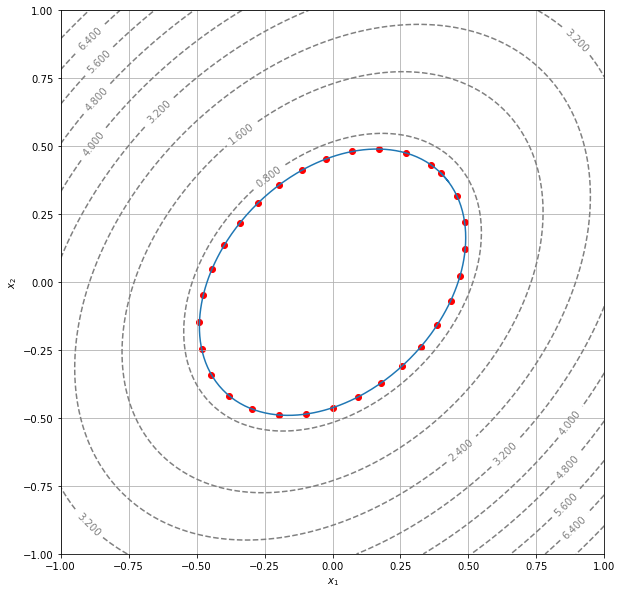

In [28]:
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)
#test sur la fonction f1

tableau1 = level_curve_question_8(f1, 0.4, 0.4, oversampling=10)
plt.plot(tableau1[0], tableau1[1])
tableau2 = level_curve_question_7(f1,0.4 , 0.4)
plt.scatter(tableau2[0], tableau2[1], color='red')
plt.show()

Auto-intersection après 119 points.
Auto-intersection après 119 points.


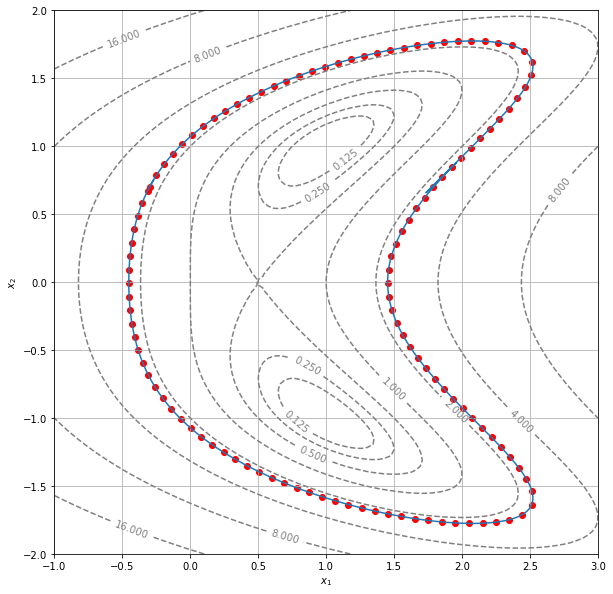

In [29]:
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)
#test sur la fonction f2

tableau1 = level_curve_question_8(f2, -0.3, 0.7, oversampling=10)
plt.plot(tableau1[0], tableau1[1])
tableau2 = level_curve_question_7(f2, -0.3 , 0.7)
plt.scatter(tableau2[0], tableau2[1], color='red')
plt.show()

Auto-intersection après 114 points.
Auto-intersection après 114 points.


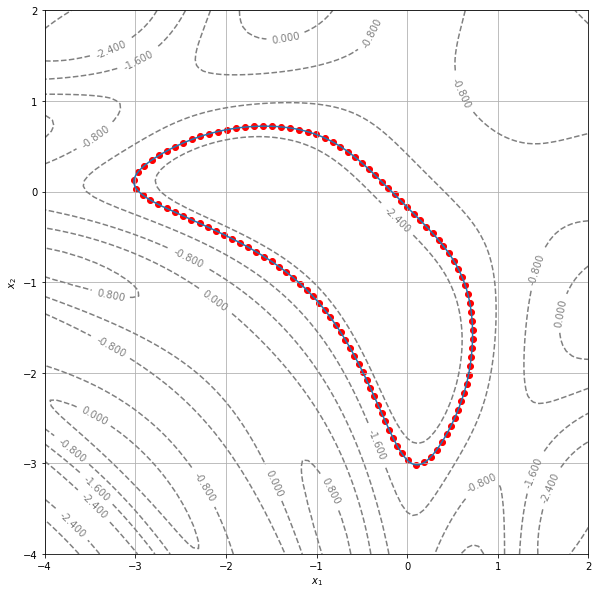

In [30]:
display_contour(
    f3, 
    x=np.linspace(-4.0, 2.0, 100), 
    y=np.linspace(-4.0, 2.0, 100), 
    levels=5, # 5 levels, automatically selected
)

#test sur la fonction f3

tableau1 = level_curve_question_8(f3, 0.4, -0.6, oversampling=10)
plt.plot(tableau1[0], tableau1[1])
tableau2 = level_curve_question_7(f3, 0.4 , -0.6)
plt.scatter(tableau2[0], tableau2[1], color='red')
plt.show()